# Model selection

After we built our Machine Learning models, some questions remained unanswered:

    How to deal with the bias variance tradeoff when building a model and evaluating its performance ?
    How to choose the optimal values for the hyperparameters (the parameters that are not learned) ?
    How to find the most appropriate Machine Learning model for my business problem ?

In this part we will answer these questions thanks to Model Selection techniques including:

    k-Fold Cross Validation
    Grid Search

Eventually we will finish this course by a last bonus section included in this part, dedicated to one of the most powerful Machine Learning model, that has become more and more popular: XGBoost.




1. Evaluate the model performance
2. Imporve our model performance

#### Model selection improves the model performance---> chooses the best learning parameters of ML model.
2 types of parameters:
1. the parameters that model learns ---> the parameters that were changed and found optimal values by running the model.
2. the parameters that we chose, like kernel parameter in Kernel SVM model,these are called the <b>Hyperparameters.</b> still room to make the  model optimal. We tune the Hyperparameters using methods like <b>Grid search</b>.<br>
Testing the set with the help of the Test set is not the best way to evaluate the model. <b>Variance problem</b> i.e. the evaluation can change according to the varying test sets. <br>
<b>K-fold cross validation</b> can help us get over the Variance problem. <br>
## K- fold cross validation:

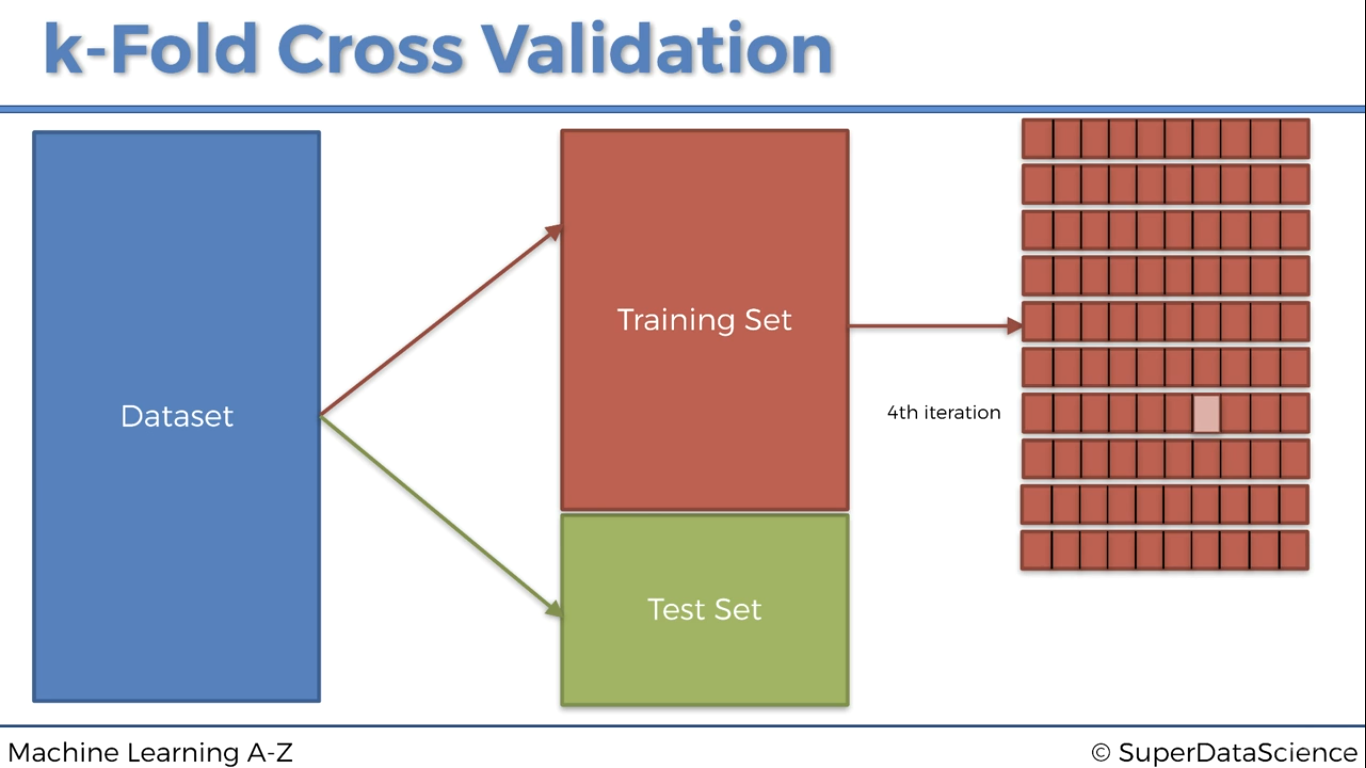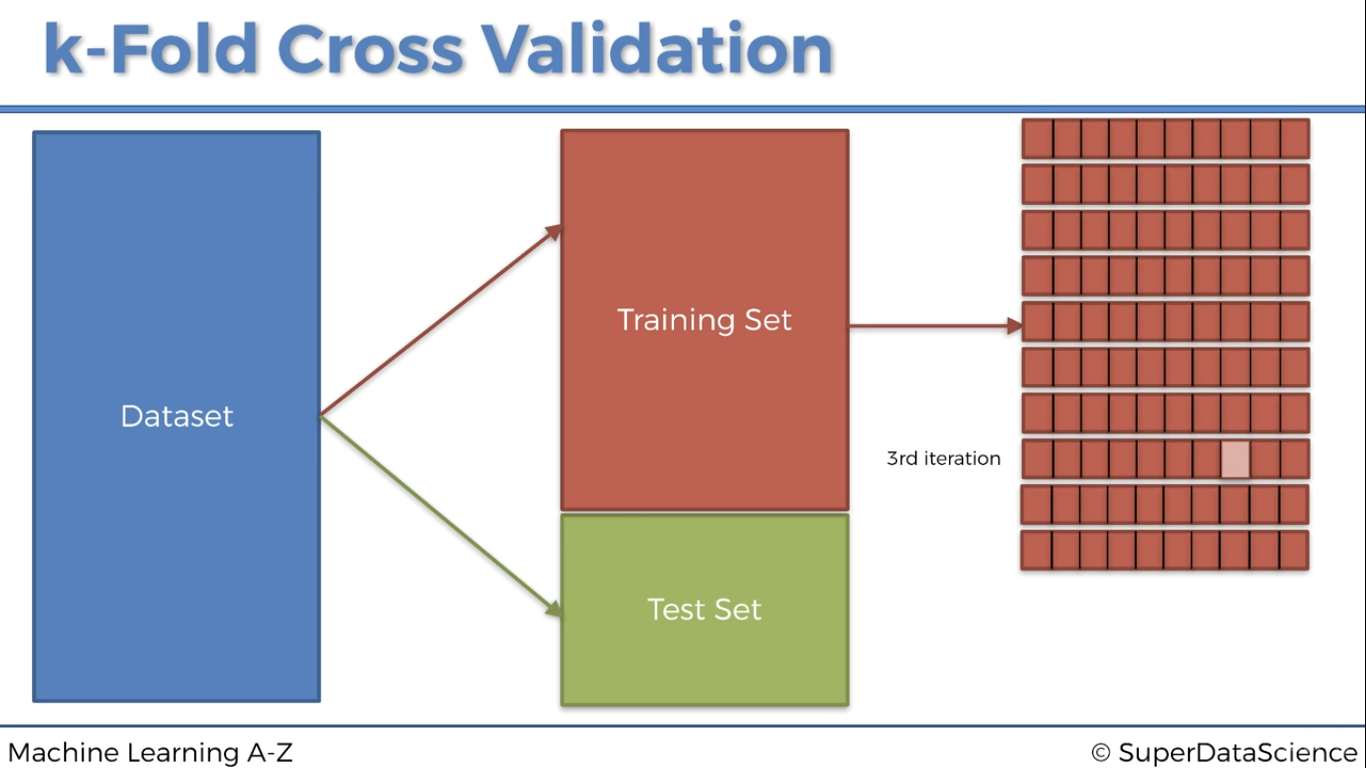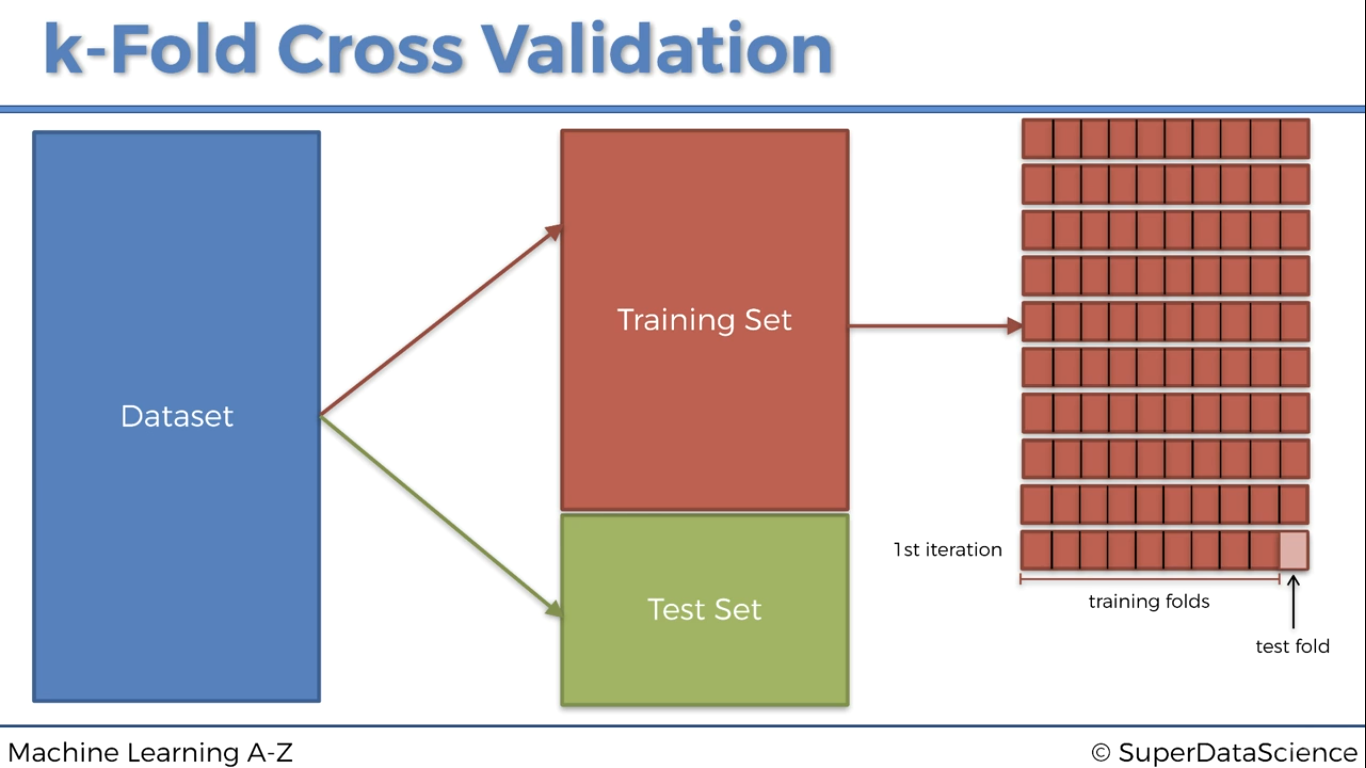

Here the dataset is divided into train and test. Spliting the training set into 10 folds where k = 10, tain our model on 9 folds and test it on the 10th. The different combinations from the 10 folds can be used to train the model and test it, finally taking the average of the different accuracies of 10 evaluations and also compute S.D. to look at variance.<br>
we can see the bias-variance tradeoff: <br>
where high accuracy---> low bias

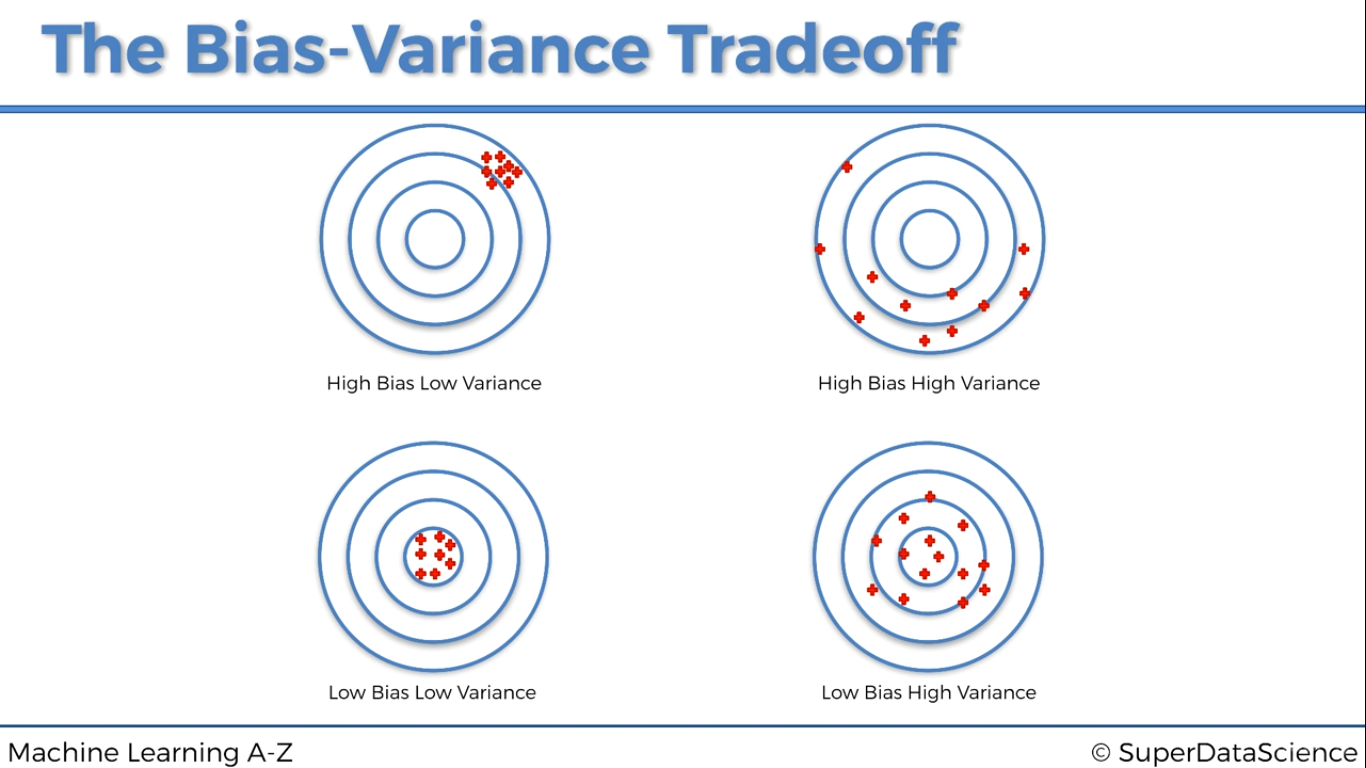

We will use Kernel SVM and try to use k-gold cross validation on this model.<br>
`social_network_ads.csv` is used<br>
`sklearn.model_selection.cross_val_score` is used to use k-fold cross validation<br>
it will return the 10 accuracies for 10 combinations.<br>
cross_val_score takes parameters---> the model, the X and y and finally `cv` the number of folds for value of k. generally 10.<br>
from vector of accuracies---> we take mean and std. here mean is ~90% i.e the accuracy of the model is 90% ie. low bias. <br>
std on accuracies give us standard deviation here sd is ~6% which is not high variance. <br>
Hence our model falls in `low bias low variance` category.

In [3]:
# Kernel SVM

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Applying K-fold cross validation:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print(accuracies)
print(accuracies.mean())
print(accuracies.std())




[0.80645161 0.96666667 0.8        0.93333333 0.86666667 0.83333333
 0.93333333 0.93333333 0.96666667 0.96551724]
0.9005302187615868
0.06388957356626285


## Next we will see Grid Search algorithm to tune the hyperparameters for optimality.

## Grid Search
First we need to see what kind of model we need: our data---> has no dependent variable---> clustering problem, if data has dependent variable---> continuous ---> regression , categorical---> classification. linear model like SVM or non linear model such as kernel SVM.<br>
For large datasets we can find out these by using Grid Search.<br>
<br>
`sklearn.model_selection.GridSearchCV` will do the grid search, it will take `parameters`---> list of dictionaries as the input. these will be the list of dictionaries containing the possible values for the parameters of the the model used. say here in information for the model in `SVC` we have parameters `C`--->penalty parameter inorder to prevent overfitting,`kernel`---> what kernel to use,`gamma`----> if non linear, what are the values of gamma, the coeff for the non linear model(1/n,n is number of features, in that range we see what values we can fiddle it with.)...<br>
don't go too much with the value for `C` as it will prevent overfitting and might start underfitting for large penalties.<br>

<br>


`GridSearchCV` takes the parameters---> model, param_grid ---> list of dicts: parameters, scoring---> for accuracy, cv--->cross validation fold, n_jobs=-1 for large dataset to fit the GridSearchCV will require all CPUs dedicated to it.<br>
`best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
`
best_parameters will give us the values for the best among provided. to fine tune it we can now be more careful and choose the options more towards the best parameters selection. in case of `gamma` say for example we get the best of 0.5 from `[0.5,0.1,0.01,0.001,0.0001]` now we give gamma the options of `[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]` This gives the value of gamma to be `0.7` and this is how we tune the Hyperparameters.

In [4]:
# Grid Search

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_parameters)





{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


<b>Hence now we build the model with these parameters.</b>

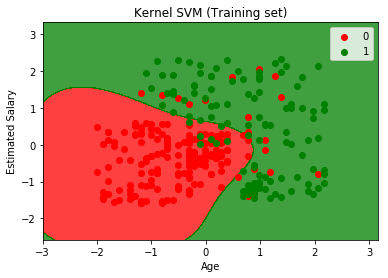

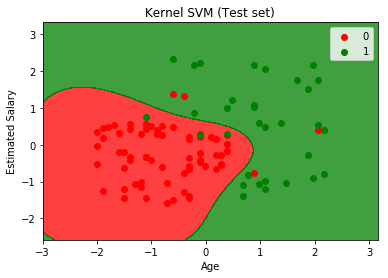

In [5]:
# Grid Search

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',C=1,gamma=0.7, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()